In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import pandas as pd
import glob
from pytz import all_timezones

In [58]:
# Pandas dataframe from pandora data
npz = np.load('PandoraAltz.npz',allow_pickle=True)
df= pd.DataFrame.from_dict({item: npz[item] for item in npz.files})
npz.close()

In [59]:
# Filtered data by qflag 0,10
options = [0,10] 
rslt_df = df[df['qflag'].isin(options)] 
#localization of dataframe so that datetime is UTC and not naive
dtimeutc=rslt_df.dtime.dt.tz_localize('Etc/UTC')
dtimelocal=dtimeutc.dt.tz_convert('Etc/GMT+6')
dflocal = rslt_df.assign(dtime=dtimelocal)
tslocal = dflocal.set_index('dtime')
### changing dobson units
tsloc_molcm2=tslocal.assign(ozone=tslocal.ozone*2.6868e16)
## grouping by hour
tslocmean = tsloc_molcm2.ozone.groupby(tslocal.index.hour).mean()
tslocstd=tsloc_molcm2.ozone.groupby(tslocal.index.hour).std()
## grouping by month
tslocmeanmt = tsloc_molcm2.ozone.groupby(tslocal.index.month).mean()
tslocstdmt = tsloc_molcm2.ozone.groupby(tslocal.index.month).std()


In [36]:
# Pandas DataFrame from MERRA2 data
# data is stored in folders by year, filenames are O3_YYYY_MM_DD_HH.txt
years = np.arange(2012,2020)
date=[]
O3=[]
#testcount = 0
for year in years:
    merrapath = 'D:\\CCA\\PANDONIA\\O3fromMERRA2\\'+'%i*\\' % (year) + '*.*'
    filelist = glob.glob(merrapath)
    #testcount = testcount + len(filelist)
    #print(testcount)
    for filename in filelist:
        tempdf = pd.read_csv(filename)
        tempdf.set_axis(['fixedP','fixedO3','modelP','modelO3'], axis=1, inplace=True)
        columnO3=tempdf.modelO3.sum()
        time=dt.datetime.strptime(filename[-17:-4],'%Y_%m_%d_%H')
        date.append(time)
        O3.append(columnO3)
merradf = pd.DataFrame(data={"date": date, "ozone": O3})


In [79]:
tsmerra = merradf.set_index('date')
tsmerrameanmt = tsmerra.ozone.groupby(tsmerra.index.month).mean()
tsmerramm = tsmerra.ozone.resample('M').mean()
tsmerramm2 = tsmerramm.groupby(tsmerramm.index.month).mean()
tsmerrastdmt = tsmerra.ozone.groupby(tsmerra.index.month).std()


C:\Users\muss\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\muss\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'kg/kg')

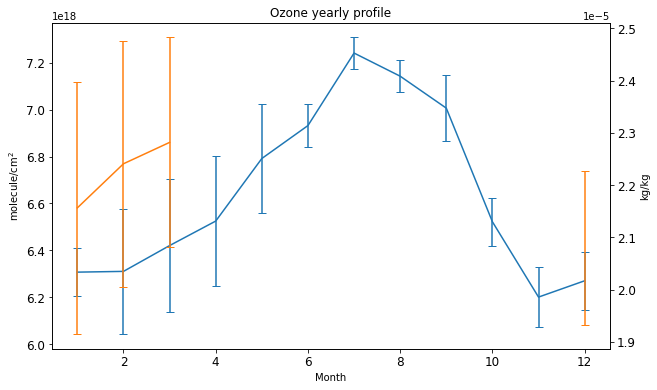

In [106]:
## simple plotting with error
ax = tslocmeanmt.plot(figsize=(10,6),title='Ozone yearly profile',ylabel='molecule/cm$^2$',yerr=tslocstdmt,capsize=4,fontsize=12)
tsmerramm2.plot(secondary_y=True,figsize=(10,6),xlabel='Month',yerr=tsmerrastdmt,capsize=4,fontsize=12)
ax.right_ax.set_ylabel('kg/kg')

AttributeError: 'PolyCollection' object has no attribute 'twinx'

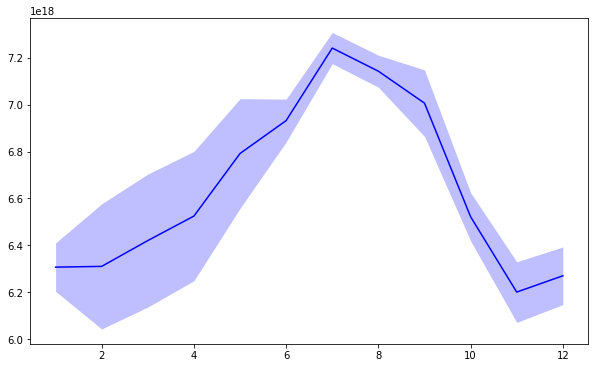

In [124]:
##pyplot plotting
x = tslocmeanmt.index
y1 = tslocmeanmt
err1 = tslocstdmt
y2 = tsmerramm2
err2 = tsmerrastdmt
fig=plt.figure(figsize=(10,6))
ax1 = plt.plot(x, y1, '-b')
ax1 = plt.fill_between(x, y1-err1, y1+err1,
    alpha=.25, edgecolor='#3F7F4C', facecolor='b',
    linewidth=0)

ax2 = ax1.twinx()  
ax1 = plt.plot(x, y2, '-g')
ax1 = plt.fill_between(x, y2-err2, y1+err2,
    alpha=.25, edgecolor='#3F7F4C', facecolor='g',
    linewidth=0)

In [ ]:
################## TESTING AFTER THIS LINE

<AxesSubplot:title={'center':'Ozone yearly profile'}, xlabel='Month', ylabel='kg/kg'>

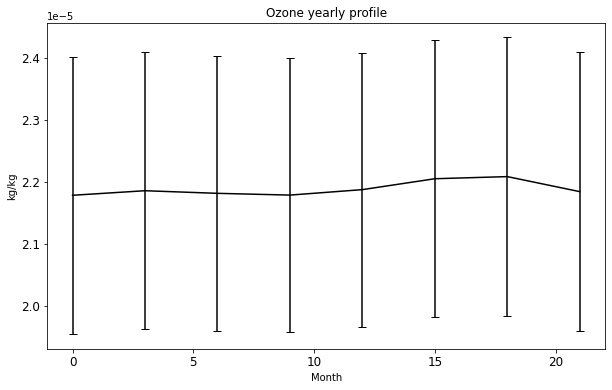

In [46]:
tsmerrameanmt = tsmerra.ozone.groupby(tsmerra.index.month).mean()
tsmerrastdmt = tsmerra.ozone.groupby(tsmerra.index.month).std()
tsmerrameanmt.plot(secondary_y=True, style='g',kind='line',figsize=(10,6),title='Ozone yearly profile',xlabel='Month',ylabel='kg/kg',yerr=tsmerrastdmt,capsize=4,fontsize=12)

In [47]:
all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [69]:
 tsmerrameanmt

date
1     0.000022
2     0.000022
3     0.000023
12    0.000021
Name: ozone, dtype: float64

In [74]:
tsmerramm = tsmerra.ozone.resample('M').mean()
tsmerramm2 = tsmerramm.groupby(tsmerramm.index.month).mean()
tsmerramm2

date
1     0.000022
2     0.000022
3     0.000023
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12    0.000021
Name: ozone, dtype: float64

<AxesSubplot:xlabel='dtime'>

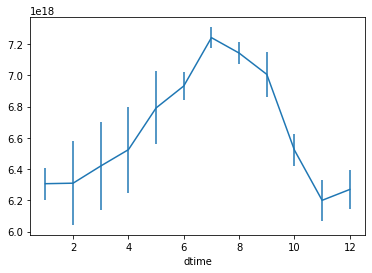

In [101]:
tslocmeanmt.plot(style='.-',yerr=tslocstdmt)

In [110]:
tslocmeanmt

dtime
1     6.306728e+18
2     6.309970e+18
3     6.420098e+18
4     6.524653e+18
5     6.791662e+18
6     6.932199e+18
7     7.241662e+18
8     7.142921e+18
9     7.006617e+18
10    6.521763e+18
11    6.200283e+18
12    6.269834e+18
Name: ozone, dtype: float64